# Importing Data

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve


# LOAD DATASET

In [6]:
import pandas as pd

# Load the dataset directly from the UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = [
    'ID', 'Diagnosis', 'Radius_mean', 'Texture_mean', 'Perimeter_mean', 'Area_mean',
    'Smoothness_mean', 'Compactness_mean', 'Concavity_mean', 'Concave_points_mean',
    'Symmetry_mean', 'Fractal_dimension_mean', 'Radius_se', 'Texture_se', 'Perimeter_se',
    'Area_se', 'Smoothness_se', 'Compactness_se', 'Concavity_se', 'Concave_points_se',
    'Symmetry_se', 'Fractal_dimension_se', 'Radius_worst', 'Texture_worst', 'Perimeter_worst',
    'Area_worst', 'Smoothness_worst', 'Compactness_worst', 'Concavity_worst',
    'Concave_points_worst', 'Symmetry_worst', 'Fractal_dimension_worst'
]
data = pd.read_csv(url, header=None, names=column_names)

# Drop the 'ID' column
data = data.drop(columns=['ID'])

# Encode the 'Diagnosis' column: M = 1 (malignant), B = 0 (benign)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

# Separate features (X) and target (y)
X = data.drop(columns='Diagnosis')
y = data['Diagnosis']


# DATA PROCESSING

In [7]:
data.info()
data.describe()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosis                569 non-null    int64  
 1   Radius_mean              569 non-null    float64
 2   Texture_mean             569 non-null    float64
 3   Perimeter_mean           569 non-null    float64
 4   Area_mean                569 non-null    float64
 5   Smoothness_mean          569 non-null    float64
 6   Compactness_mean         569 non-null    float64
 7   Concavity_mean           569 non-null    float64
 8   Concave_points_mean      569 non-null    float64
 9   Symmetry_mean            569 non-null    float64
 10  Fractal_dimension_mean   569 non-null    float64
 11  Radius_se                569 non-null    float64
 12  Texture_se               569 non-null    float64
 13  Perimeter_se             569 non-null    float64
 14  Area_se                  5

,0
Diagnosis,0
Radius_mean,0
Texture_mean,0
Perimeter_mean,0
Area_mean,0
Smoothness_mean,0
Compactness_mean,0
Concavity_mean,0
Concave_points_mean,0
Symmetry_mean,0


# DATA CLEANING

# DATA VISUALIZATION

## Plot Count

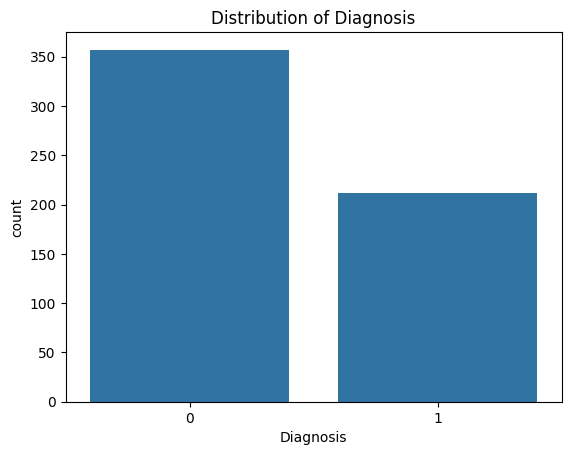

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the 'Diagnosis' column
sns.countplot(x='Diagnosis', data=data)
plt.title("Distribution of Diagnosis")
plt.show()


## Plot Correlations

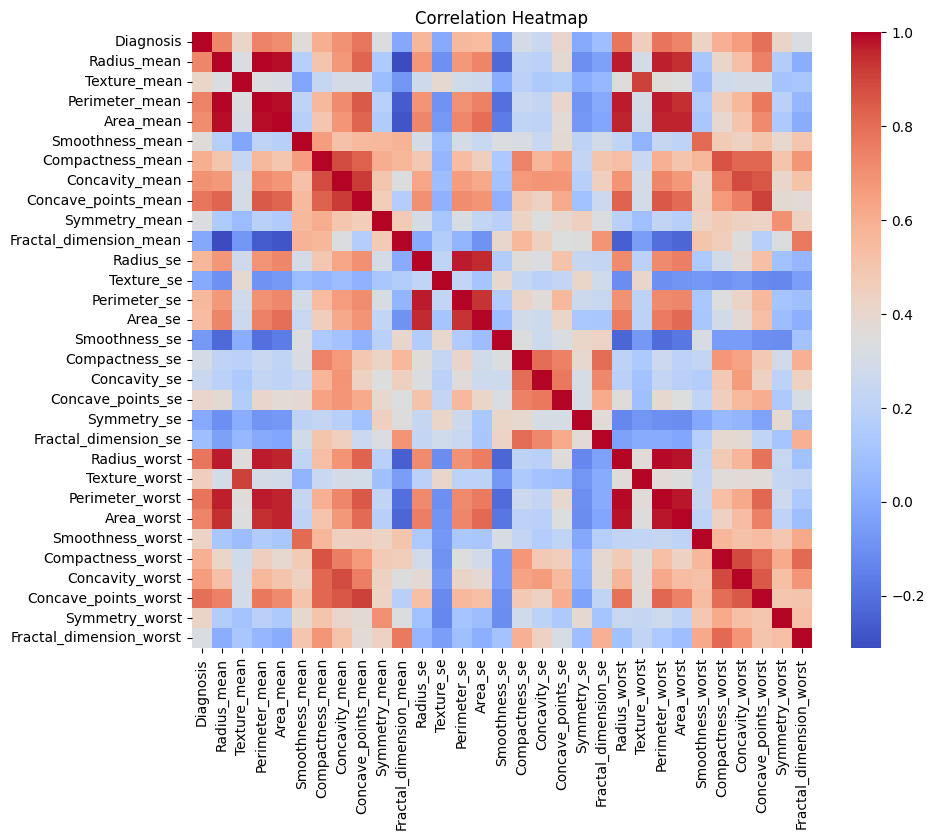

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


# SPLIT DATA

In [11]:
# Use the correct column name 'Diagnosis'
X = data.drop(columns='Diagnosis')
y = data['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# TRAINING DATA

In [12]:
# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Train each model
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully.")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression trained successfully.
Decision Tree trained successfully.
Random Forest trained successfully.


# EVALUATE

In [13]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Evaluating {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Evaluating Logistic Regression
Accuracy: 0.9707602339181286
Precision: 0.9833333333333333
Recall: 0.9365079365079365
F1 Score: 0.959349593495935
ROC AUC: 0.9636243386243386
Confusion Matrix:
 [[107   1]
 [  4  59]]
Evaluating Decision Tree
Accuracy: 0.935672514619883
Precision: 0.8823529411764706
Recall: 0.9523809523809523
F1 Score: 0.916030534351145
ROC AUC: 0.9391534391534392
Confusion Matrix:
 [[100   8]
 [  3  60]]
Evaluating Random Forest
Accuracy: 0.9766081871345029
Precision: 0.9836065573770492
Recall: 0.9523809523809523
F1 Score: 0.967741935483871
ROC AUC: 0.9715608465608465
Confusion Matrix:
 [[107   1]
 [  3  60]]


# PLOT ROC

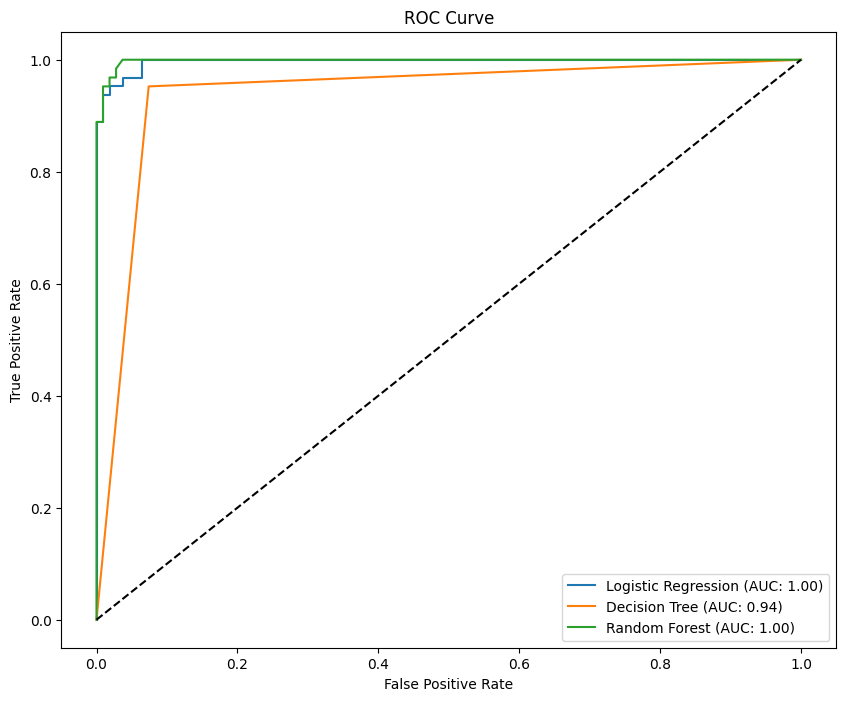

In [14]:
plt.figure(figsize=(10, 8))

for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC: {roc_auc_score(y_test, y_pred_proba):.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()
